In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('DatosfiltradosII.csv', header = 0)

In [4]:
data=data.drop(columns=['Cod.Car.Sec','Unnamed: 0','Nota.Final','Anho.Firma'])

In [5]:
#data['Anho.Firma']=np.where(data['Anho.Firma']>0,1,data['Anho.Firma'])

In [6]:
#for x in range(1897):
    #data['Nota.Final'].values[x]= str(data['Nota.Final'].values[x]).split(",")[-1].split("-")[-1]

In [7]:
#data['Nota.Final']=np.where(data['Nota.Final']=='nan',0,data['Nota.Final'])
#data['Nota.Final']=data['Nota.Final'].apply(pd.to_numeric) 


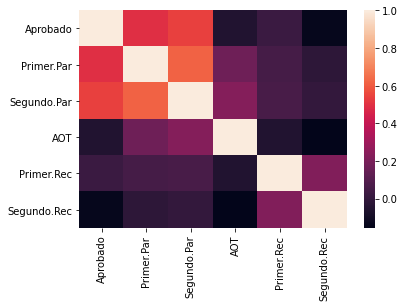

In [8]:
sns.heatmap(data.corr())

In [60]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Aprobado',axis=1),data['Aprobado'],test_size=0.5) # con 0.5 se encontro la mejores metricas

In [61]:
LogReg= LogisticRegression(solver='lbfgs',max_iter=1050)
LogReg.fit(X_train,y_train)
print(X_train.columns)

Index(['Primer.Par', 'Segundo.Par', 'AOT', 'Primer.Rec', 'Segundo.Rec'], dtype='object')


In [62]:
from sklearn.metrics import confusion_matrix
y_pred=LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[561  79]
 [ 72 237]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test.T,y_pred.T))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       621
           1       0.80      0.74      0.77       328

    accuracy                           0.85       949
   macro avg       0.83      0.82      0.83       949
weighted avg       0.84      0.85      0.84       949



              precision    recall  f1-score   support

           0       0.87      0.86      0.87       320
           1       0.72      0.74      0.73       155

    accuracy                           0.82       475
   macro avg       0.80      0.80      0.80       475
weighted avg       0.82      0.82      0.82       475

